In [130]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import free_fermion_representation as f
import PhaseDiagram as PD


import importlib
importlib.reload(site)
importlib.reload(honey)
importlib.reload(f)
importlib.reload(PD)

<module 'PhaseDiagram' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/PhaseDiagram.py'>

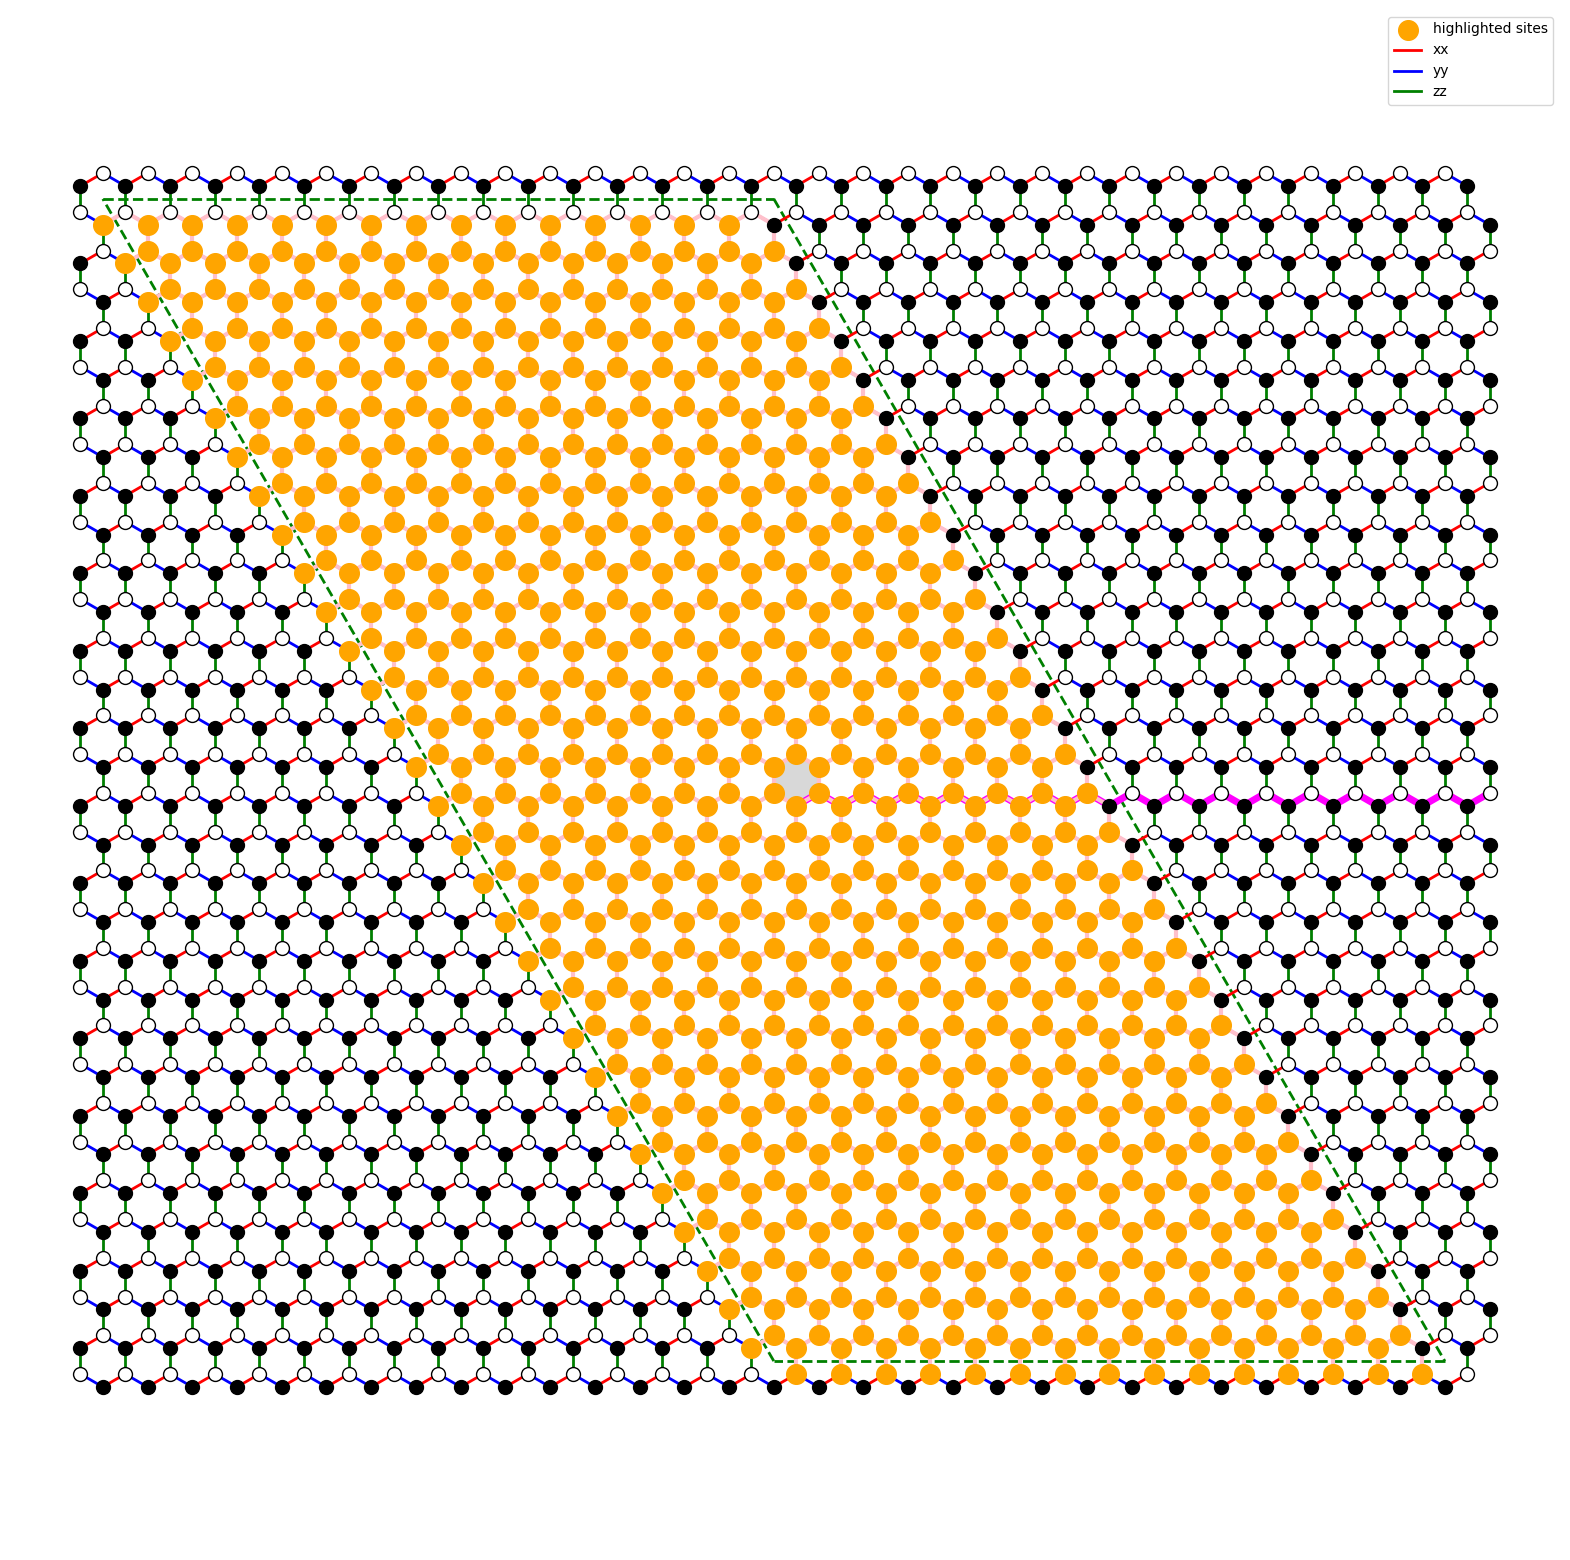

In [131]:
model = site.SitesOBC(Npx = 31, Npy = 31, edge = True)

prefactor, loop_indices, links_list, _ = model.get_loop()

central_plaquette = model.get_anyonbonds()[1]

honey.plot_honeycomb(model, plot_anyon_bonds = True,
                    sites = loop_indices, dotsize = 200,
                    loop = True,
                    plot_diagonal_bonds=False,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list
                    )

In [132]:
print(model.Nsites)

2046


In [133]:
fgs = f.FermionicGaussianRepresentation(model)


In [134]:
delta = 0
T = 0.7
N_cycles = 20

In [135]:
orderpar = PD.order_parameter_delta_T_method2(model, fgs, delta, T, N_cycles)

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


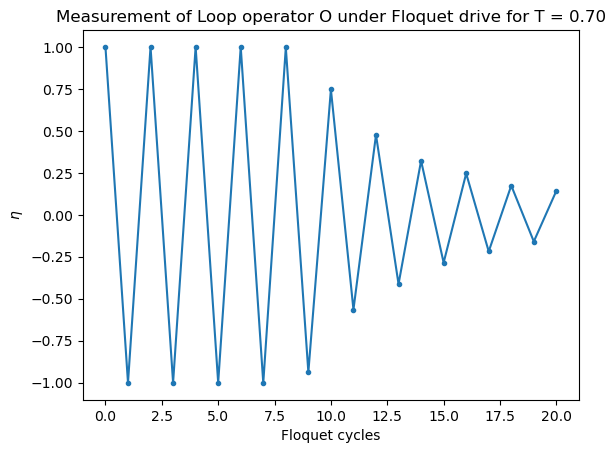

In [ ]:
plt.plot(range(N_cycles+1), orderpar, '.-')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title(f"Measurement of Loop operator O under Floquet drive for T = {T:.2f}")
plt.show()

## 2D Phase Diagram

We run the big function!

In [138]:
delta_list = [0, 0.1]
T_list = np.linspace(1,0.6,10).tolist()
N_cycles = 10

In [ ]:
freqs, N_list, data_grid = PD.order_parameter(model, T_list, delta_list, N_cycles, method = '2')

delta:  0 ;   T:  1.0
delta:  0 ;   T:  0.9555555555555556
delta:  0 ;   T:  0.9111111111111111
delta:  0 ;   T:  0.8666666666666667
delta:  0 ;   T:  0.8222222222222222
delta:  0 ;   T:  0.7777777777777778
delta:  0 ;   T:  0.7333333333333334
delta:  0 ;   T:  0.6888888888888889
delta:  0 ;   T:  0.6444444444444444
delta:  0 ;   T:  0.6
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  0.9555555555555556
delta:  0.1 ;   T:  0.9111111111111111
delta:  0.1 ;   T:  0.8666666666666667
delta:  0.1 ;   T:  0.8222222222222222
delta:  0.1 ;   T:  0.7777777777777778
delta:  0.1 ;   T:  0.7333333333333334
delta:  0.1 ;   T:  0.6888888888888889
delta:  0.1 ;   T:  0.6444444444444444
delta:  0.1 ;   T:  0.6


In [140]:
freqs_fast, N_list_fast, data_grid_fast = PD.order_parameter_parallel(model, T_list, delta_list, N_cycles, method = '2')

Save the data if wanted (doit = True)

In [147]:
PD.save_file(data_grid, 'data_grid_slow', doit = True)
PD.save_file(data_grid_fast, 'data_grid_fast', doit = True)

Load it if wanted (doit = True)

In [ ]:
data_grid_loaded = PD.load_file(data_grid, data_grid, doit = False)

Do the colorplot!

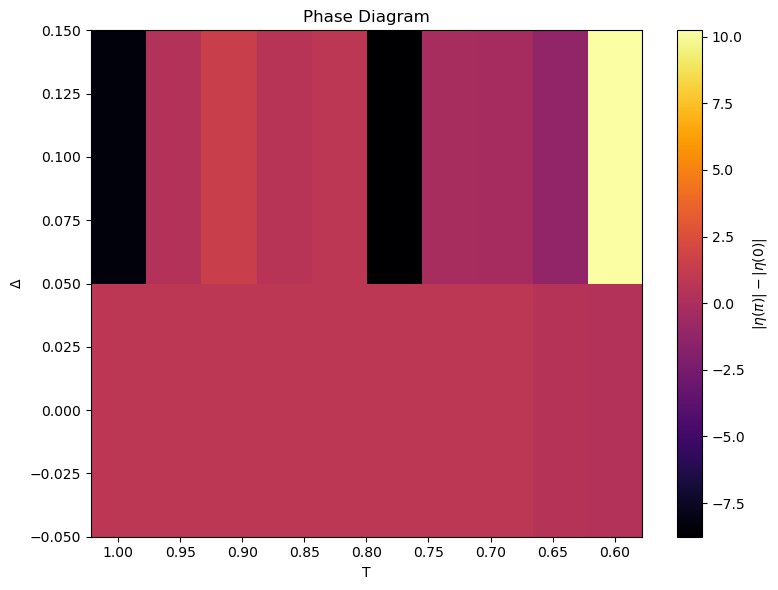

In [141]:
PD.plot_phase_diagram(data_grid, T_list, delta_list)

(2, 10)


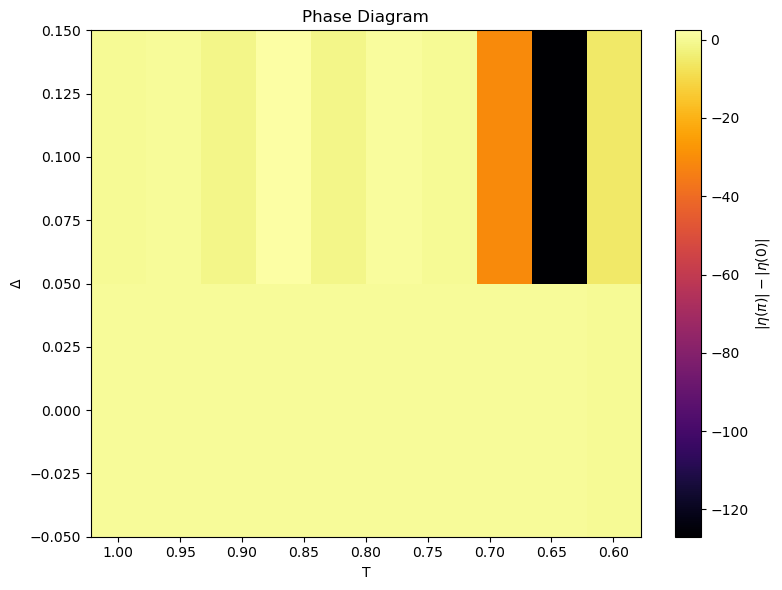

In [142]:
print(data_grid_fast.shape)
PD.plot_phase_diagram(data_grid_fast, T_list, delta_list)

Plot order parameter and respective Fourier transform for certain values

In [143]:
# Choose the specific values you're interested in
delta_target = 0
T_target = 0.6

# Get indices from mapping
i = delta_list.index(delta_target)
j = T_list.index(T_target)

# Access the dictionary stored at that position
entry = data_grid[i, j]
entry_fast = data_grid_fast[i,j]

# Extract what you want
op_real = entry['op_real']
op_ft = entry['op_ft']

op_real_fast = entry_fast['op_real']
op_ft_fast = entry_fast['op_ft']


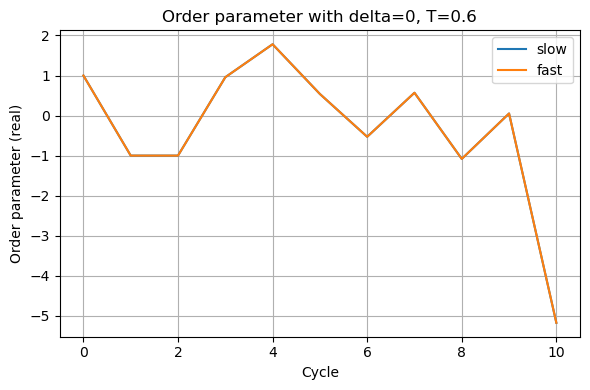

In [144]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(N_cycles+1), op_real, label="slow")
plt.plot(np.arange(N_cycles+1), op_real_fast, label = "fast")
plt.xlabel("Cycle")
plt.ylabel("Order parameter (real)")
plt.title(f"Order parameter with delta={delta_target}, T={T_target}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

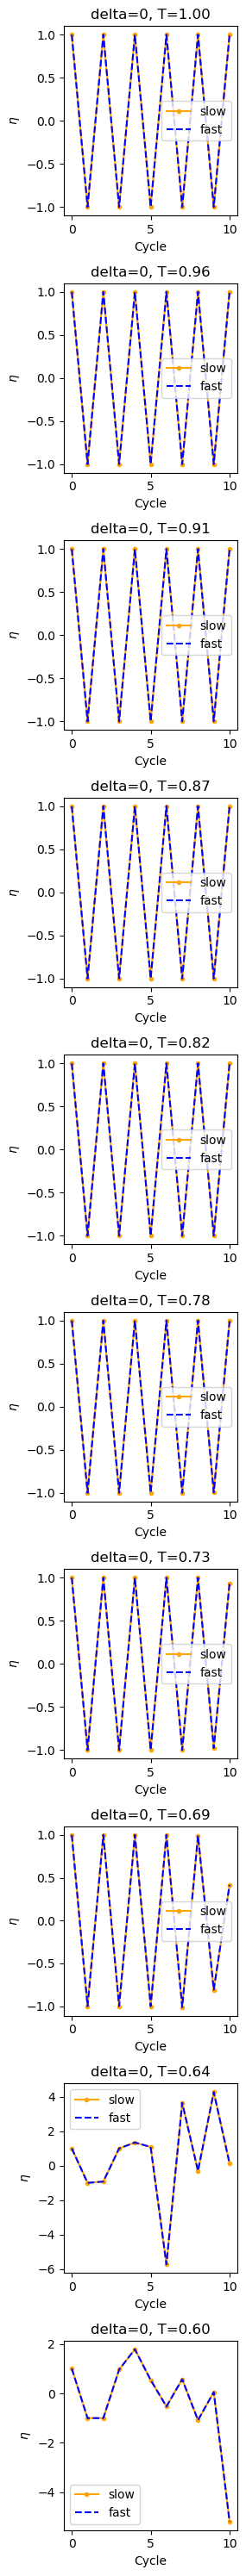

In [145]:
nrows = len(T_list)
ncols = 1 
fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize= (ncols*3,nrows*3))

delta_target = 0
i = delta_list.index(delta_target)


for idx, T in enumerate(T_list):
    # Choose the specific values you're interested in

    T_target = T

    # Get indices from mapping
    j = T_list.index(T_target)

    # Access the dictionary stored at that position
    entry = data_grid[i, j]
    entry_fast = data_grid_fast[i,j]

    # Extract what you want
    op_real = entry['op_real']

    op_real_fast = entry_fast['op_real']

    ax[idx].plot(np.arange(N_cycles+1), op_real, '.-', color = "orange", label= "slow")
    ax[idx].plot(np.arange(N_cycles+1), op_real_fast, '--', color = "blue", label = "fast")
    ax[idx].set_title(f"delta={delta_target}, T={T_target:.2f}")
    ax[idx].set_xlabel("Cycle")
    ax[idx].set_ylabel(r"$\eta$")
    ax[idx].legend()
plt.tight_layout()
plt.show()

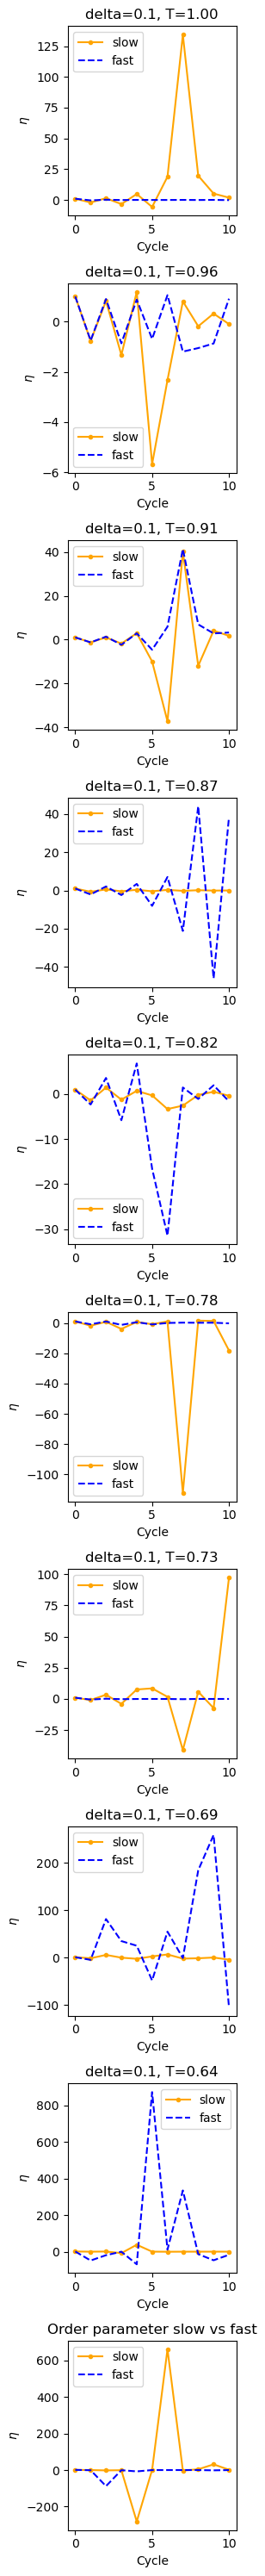

In [146]:
nrows = len(T_list)
ncols = 1 
fig, ax = plt.subplots(nrows = nrows, ncols=ncols, figsize= (ncols*3,nrows*3))

delta_target = 0.1
i = delta_list.index(delta_target)


for idx, T in enumerate(T_list):
    # Choose the specific values you're interested in

    T_target = T

    # Get indices from mapping
    j = T_list.index(T_target)

    # Access the dictionary stored at that position
    entry = data_grid[i, j]
    entry_fast = data_grid_fast[i,j]

    # Extract what you want
    op_real = entry['op_real']

    op_real_fast = entry_fast['op_real']

    ax[idx].plot(np.arange(N_cycles+1), op_real, '.-', color = "orange", label= "slow")
    ax[idx].plot(np.arange(N_cycles+1), op_real_fast, '--', color = "blue", label = "fast")
    ax[idx].set_title(f"delta={delta_target}, T={T_target:.2f}")
    ax[idx].set_xlabel("Cycle")
    ax[idx].set_ylabel(r"$\eta$")
    ax[idx].legend()
plt.title(f"Order parameter slow vs fast")
plt.tight_layout()
plt.show()